# Decision Trees from Scratch
## Information Gain
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$

## Shannon Entropy
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$

In [22]:
import numpy as np
import seaborn as sns
sns.set_style('ticks')
from matplotlib import pyplot as plt
%matplotlib inline

from typing import List

## Entropy
A function that calculates the entropy of a given list.

In [23]:
def entropy(y: List) -> float:
    counts = np.unique(y, return_counts=True)[1]
    probas = counts/sum(counts)
    s = -1*sum(probas * np.log2(probas))
    return s

### Example Entropy

In [24]:
entropy([0,1,1])

0.9182958340544896

In [25]:
entropy([1,1,1,1,1,1,1,1,0])

0.5032583347756457

In [26]:
entropy([1,1,1])


-0.0

## Information Gain

In [27]:
def info_gain(x: List, y: List, thresh: float) -> float:
    """Returns information gain of splitting data x at threshold thresh."""
    x = np.array(x)
    y = np.array(y)
    length = len(y)

    mask = x <= thresh
    y_left = y[mask]
    y_right = y[~mask]

    return entropy(y) - (len(y_right)/length * entropy(y_right) + len(y_left)/length * entropy(y_left))

In [28]:
info_gain([1,2,3,4,5,6], [1,0,0,0,0,0], 2)

0.3166890883150208

## Generate Fake Data

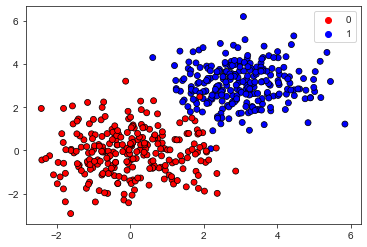

In [29]:
from sklearn.datasets import make_blobs
X, label = make_blobs(n_samples=500, centers=((0,0), (3,3)))
sns.scatterplot(X[:,0], X[:,1], hue=label, palette=('r', 'b'), edgecolor='k')

In [30]:
def find_best_split(x: List, y: List) -> float:
    """Returns best threshold to split data at"""
    info_gains = []
    for thresh in np.unique(x):
        info_gains.append((thresh, info_gain(x, y, thresh)))
    info_gains = np.array(info_gains)
    best_thresh = np.argmax(info_gains, axis=0)[1]
    return info_gains[best_thresh, 0]

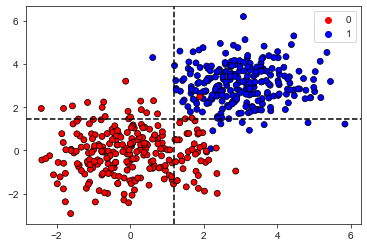

In [31]:
x_best = find_best_split(X[:, 0], label)
y_best = find_best_split(X[:, 1], label)
sns.scatterplot(X[:, 0], X[:, 1], hue=label, palette=('r', 'b'), edgecolor='k')
plt.axvline(x_best, c='k', ls='--')
plt.axhline(y_best, c='k', ls='--')